In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

In [161]:
file_path = "weighted_score_above_08.csv"
reviews_df = pd.read_csv(file_path)

C:\Users\srjsi\AppData\Local\Temp\ipykernel_38580\1036163552.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.read_csv(file_path)


In [162]:
filtered_df = reviews_df[["game", "language", "voted_up", "votes_up", "votes_funny", "received_for_free", "author_num_reviews"]]

In [166]:
# Discard reviews with null values
print("Row number before dropping N/A cells:", len(filtered_df))
filtered_df = filtered_df.dropna()
print("Row number after dropping N/A cells:", len(filtered_df))

Row number before dropping N/A cells: 498061
Row number after dropping N/A cells: 498061


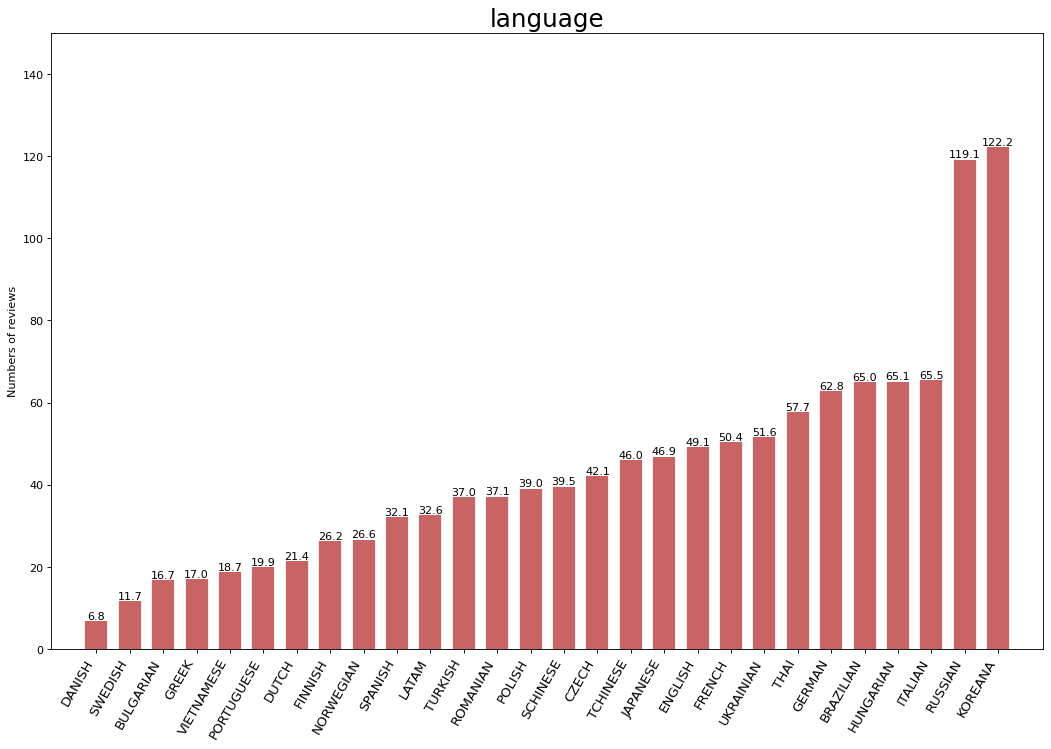

In [167]:
# Reference: https://www.kaggle.com/code/anastasiiademidova/assignment1
df = filtered_df[['author_num_reviews', 'language']].groupby('language').apply(lambda x: x.mean())
df.sort_values('author_num_reviews', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.author_num_reviews, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, author_num_reviews in enumerate(df.author_num_reviews):
    ax.text(i, author_num_reviews+0.5, round(author_num_reviews, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('language', fontdict={'size':22})
ax.set(ylabel='Numbers of reviews', ylim=(0, 150))
plt.xticks(df.index, df.language.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

plt.show()

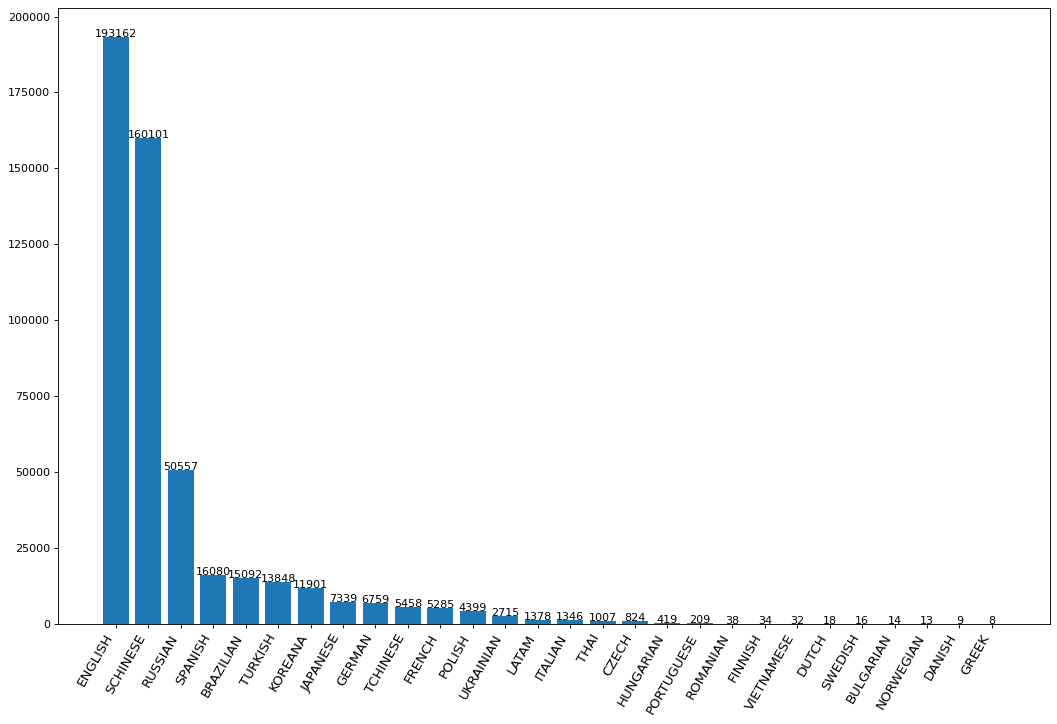

In [82]:
category_counts = filtered_df['language'].value_counts().reset_index()
# print(category_counts.head())
# plt.figure(figsize=(16, 10))
fig, ax = plt.subplots(figsize=(16, 10), facecolor='white', dpi=80)
plt.bar(category_counts['language'], category_counts['count'])

for i, count in enumerate(category_counts['count']):
    ax.text(i, count + 0.5, round(count, 1), horizontalalignment='center')

plt.xticks(category_counts.index, category_counts.language.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

plt.show()

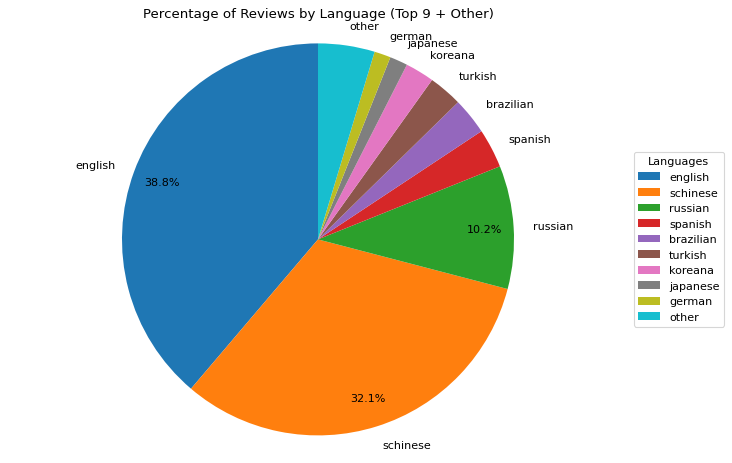

In [184]:
# Assuming filtered_df['language'].value_counts() gives you the count of reviews per language
category_counts = filtered_df['language'].value_counts().reset_index()
category_counts.columns = ['language', 'count']  # renaming columns for clarity

# Keep top 9 languages, combine the rest into "other"
top_languages = category_counts[:9]
other_languages = category_counts[9:]
other_sum = other_languages['count'].sum()  # Summing up the count of all other languages

# Creating a new DataFrame for 'Other'
other_df = pd.DataFrame({'language': ['other'], 'count': [other_sum]})

# Concatenating top languages with the new 'Other' DataFrame
final_languages = pd.concat([top_languages, other_df], ignore_index=True)

# Creating the pie chart with adjusted autopct and explode parameters
fig, ax = plt.subplots(figsize=(10, 7), facecolor='white', dpi=80)

# Create an 'explode' array which will offset slices in the pie chart
explode = [0.1 if count < 5 else 0 for count in final_languages['count']]  # Explode if count is less than 5%

# Function to only show percentages above a certain threshold
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:.1f}%'.format(v=pct) if pct > 5 else ''  # Only show if percentage is greater than 5
    return my_format

ax.pie(final_languages['count'], labels=final_languages['language'], autopct=autopct_format(final_languages['count']),
       startangle=90, explode=explode, pctdistance=0.85)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Reviews by Language (Top 9 + Other)')
plt.legend(title="Languages", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


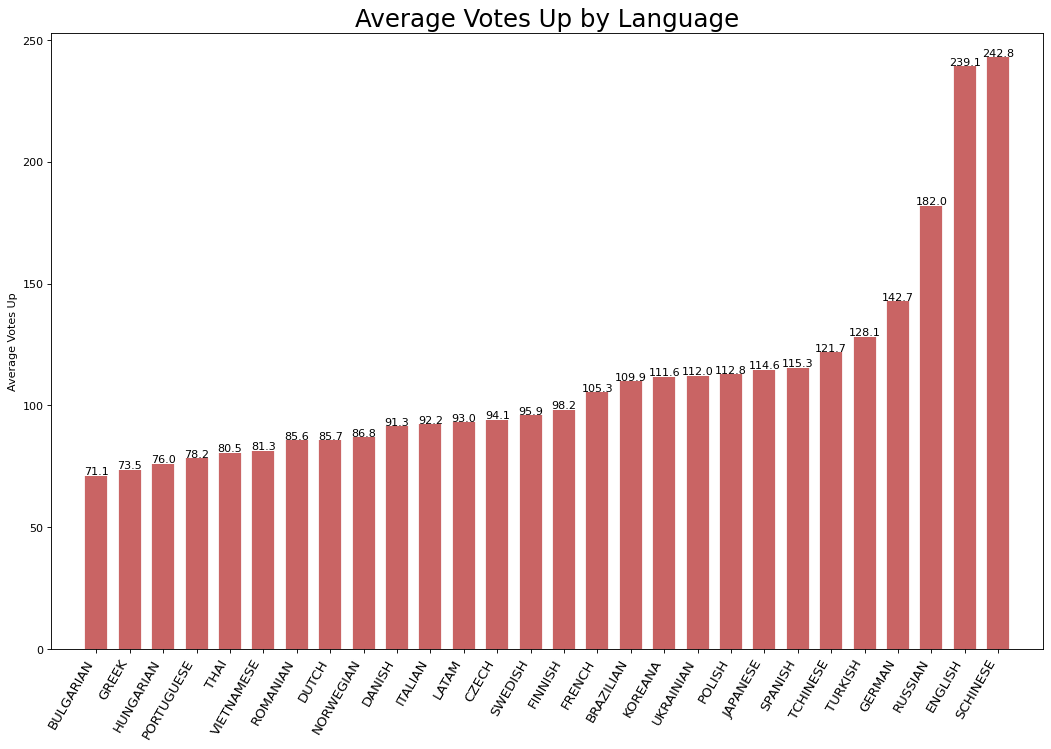

In [80]:
# language vs average votes_up

# Group by language and calculate the mean of votes_up
df = filtered_df[["language", "votes_up"]].groupby('language')['votes_up'].mean()
df.sort_values(inplace=True)  # Sort by mean votes_up
df = df.reset_index()  # Reset index to get language as a column

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.votes_up, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, votes_up in enumerate(df.votes_up):
    ax.text(i, votes_up + 0.5, round(votes_up, 1), horizontalalignment='center')

# Title, Label, Ticks and Ylim
ax.set_title('Average Votes Up by Language', fontdict={'size':22})
ax.set(ylabel='Average Votes Up', ylim=(0, df.votes_up.max() + 10))
plt.xticks(df.index, df.language.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

plt.show()

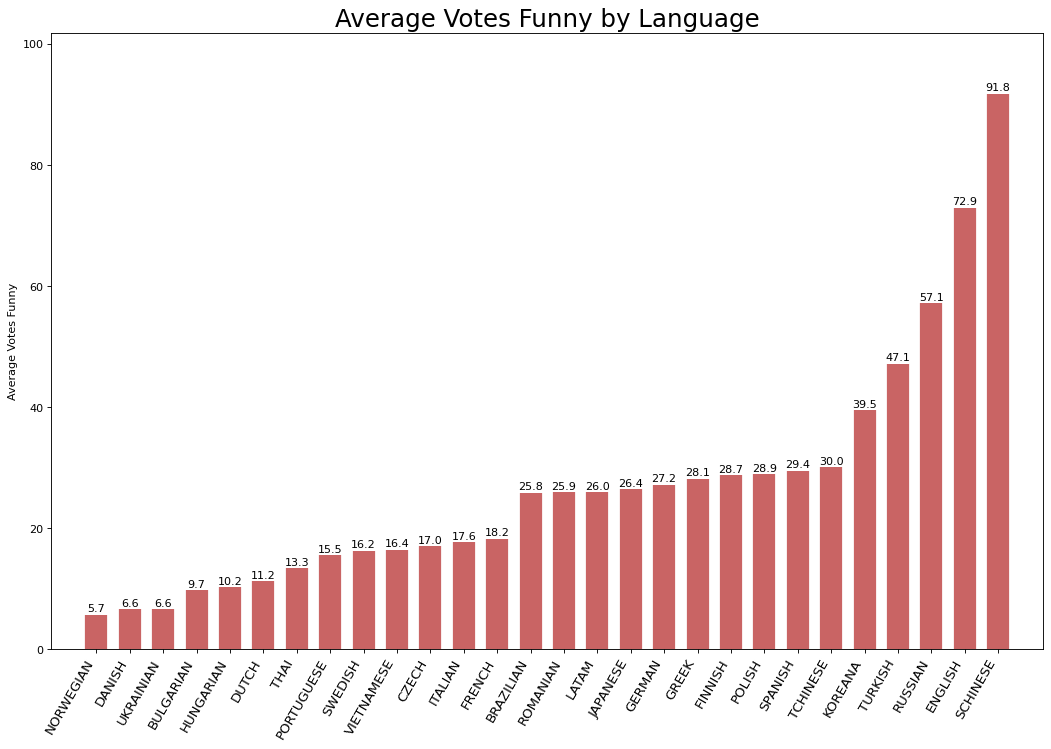

In [92]:
# language vs average votes_funny

# Assuming 'reviews_df' is your DataFrame containing the Steam reviews data

# Group by language and calculate the mean of votes_funny
df = filtered_df[["language", "votes_funny"]]
df = df.loc[df["votes_funny"] <= 1000000]
df = df.groupby('language')['votes_funny'].mean()
df.sort_values(inplace=True)  # Sort by mean votes_funny
df = df.reset_index()  # Reset index to get language as a column

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi=80)
ax.vlines(x=df.index, ymin=0, ymax=df.votes_funny, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, votes_funny in enumerate(df.votes_funny):
    ax.text(i, votes_funny + 0.5, round(votes_funny, 1), horizontalalignment='center')

# Title, Label, Ticks and Ylim
ax.set_title('Average Votes Funny by Language', fontdict={'size':22})
ax.set(ylabel='Average Votes Funny', ylim=(0, df.votes_funny.max() + 10))
plt.xticks(df.index, df.language.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

plt.show()


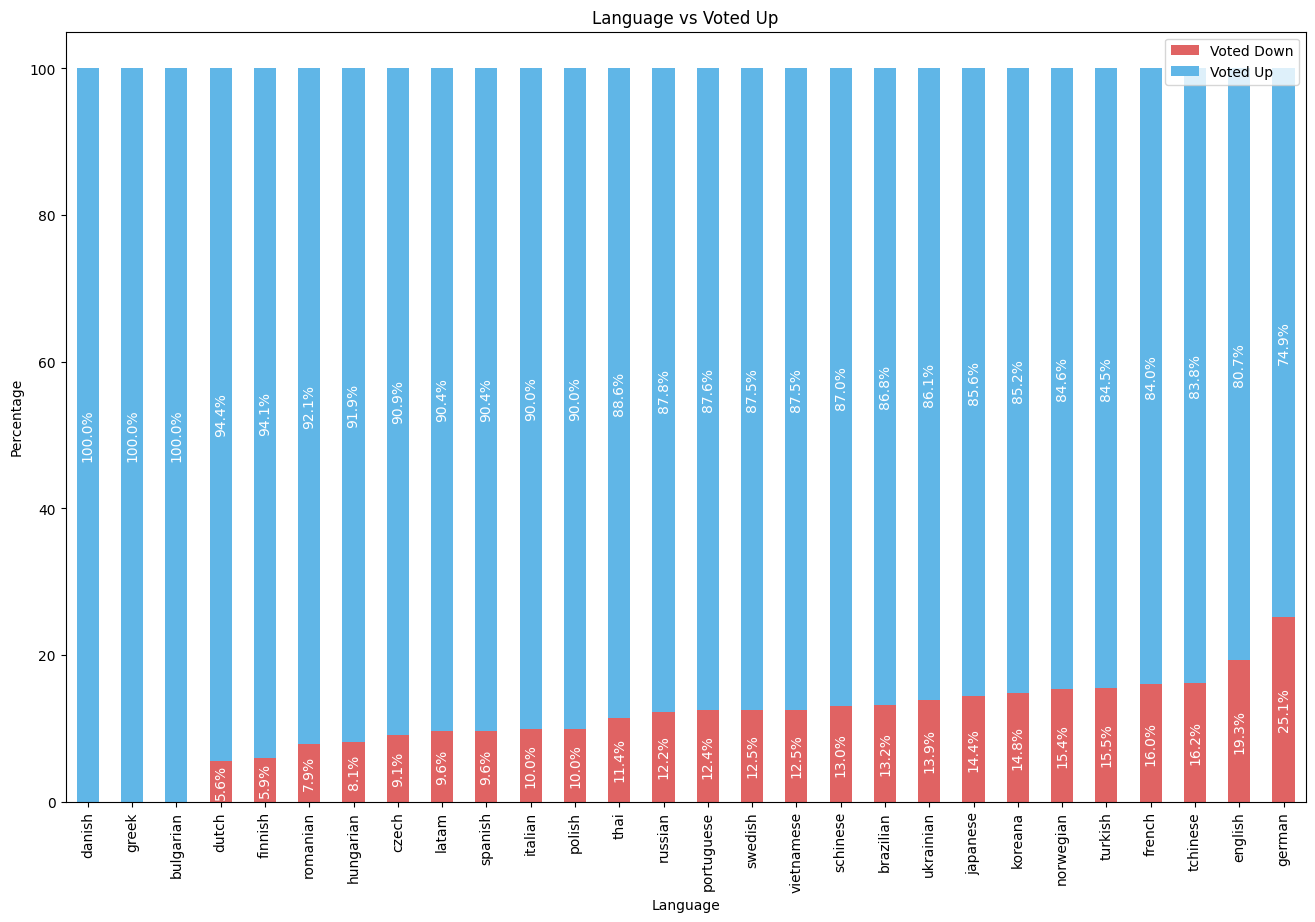

In [120]:
# Language vs voted_up
df = filtered_df.groupby(['language', 'voted_up']).size().unstack(fill_value=0)
df = df.div(df.sum(axis=1), axis=0) * 100
df = df.sort_values(by='language')
sorted_lan = df[1].sort_values(ascending=False).index
df = df.loc[sorted_lan]
ax = df.plot(kind='bar', stacked=True, figsize=(16,10), color=["#e06363", "#60b6e7"])

plt.title('Language vs Voted Up')
plt.xlabel('Language')
plt.ylabel('Percentage')
plt.legend(loc='upper right', labels=['Voted Down', 'Voted Up'])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', rotation='vertical', color='white')

plt.show()

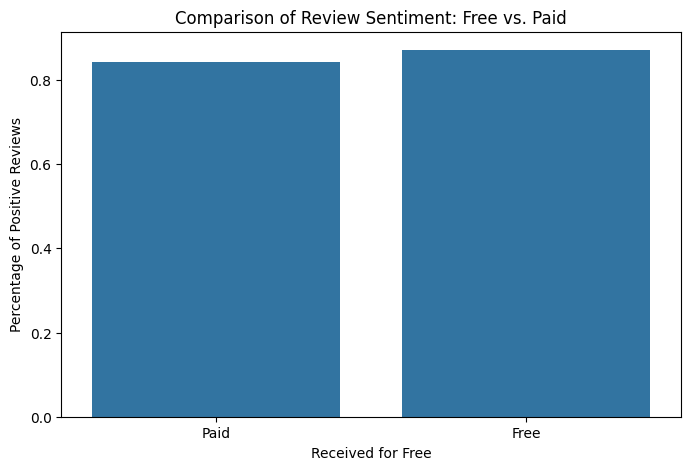

In [131]:


# Assuming 'reviews_df' is your DataFrame containing the Steam reviews data
# Calculate the percentage of positive reviews for both groups
sentiment_group = filtered_df.groupby('received_for_free')['voted_up'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='received_for_free', y='voted_up', data=sentiment_group)
plt.title('Comparison of Review Sentiment: Free vs. Paid')
plt.xlabel('Received for Free')
plt.ylabel('Percentage of Positive Reviews')
plt.xticks([0, 1], ['Paid', 'Free'])
plt.show()

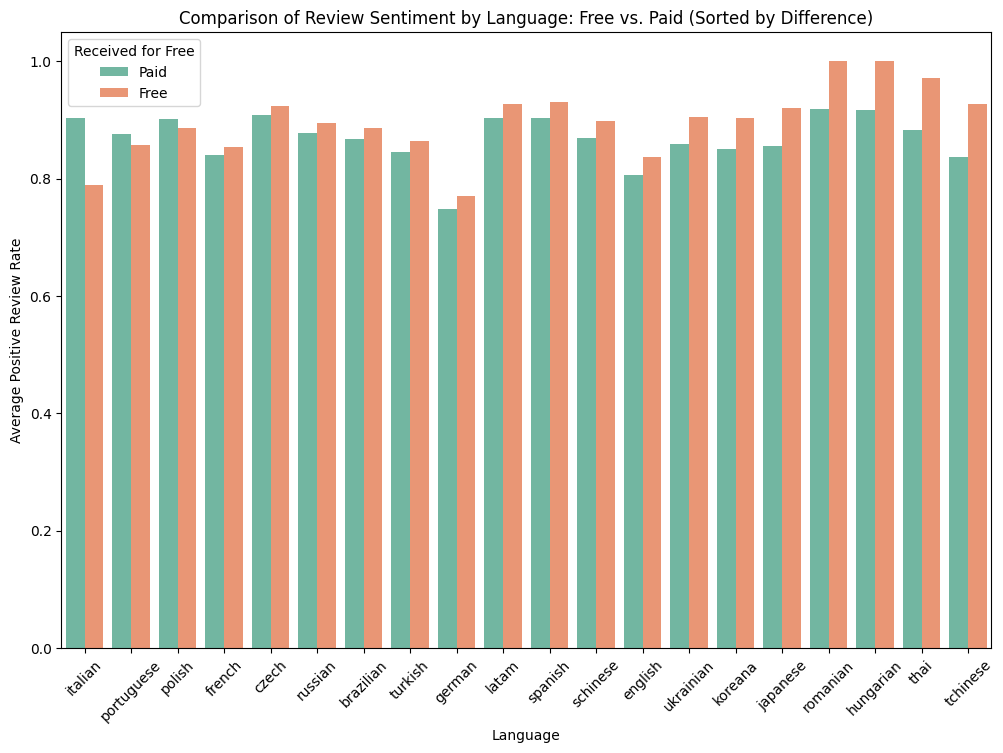

In [195]:
# Comparison of Sentiment Between Free and Paid Reviews

# First, filter necessary columns and calculate mean sentiment by language and whether the game was received for free
df_wo_v = filtered_df[filtered_df['language'] != 'vietnamese']

grouped_data = df_wo_v.groupby(['language', 'received_for_free'])['voted_up'].mean().unstack()

# Remove languages with no free reviews (where received_for_free = 1 is NaN)
grouped_data = grouped_data[grouped_data[1].notna()]

# Calculate the difference between the free and paid review sentiments
grouped_data['diff'] = grouped_data[1] - grouped_data[0]  # Assuming 1=True (received for free), 0=False (paid)

# Sort the DataFrame by this difference
grouped_data.sort_values('diff', ascending=True, inplace=True)

# Reset index to make 'language' a column (depends on your DataFrame setup)
grouped_data.reset_index(inplace=True)

# Melt the DataFrame to long format suitable for sns.barplot
melted_data = grouped_data.melt(id_vars='language', value_vars=[0, 1], var_name='received_for_free', value_name='average_sentiment')


# Convert 'received_for_free' to more readable form
melted_data['received_for_free'] = melted_data['received_for_free'].map({0: 'Paid', 1: 'Free'})

# Plot
plt.figure(figsize=(12, 8))
bar = sns.barplot(x='language', y='average_sentiment', hue='received_for_free', data=melted_data, palette='Set2')

# Correct legend
handles, labels = bar.get_legend_handles_labels()
bar.legend(handles=handles, labels=labels, title='Received for Free')

plt.title('Comparison of Review Sentiment by Language: Free vs. Paid (Sorted by Difference)')
plt.xlabel('Language')
plt.ylabel('Average Positive Review Rate')
plt.xticks(rotation=45)
plt.show()

In [174]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

s = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srjsi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


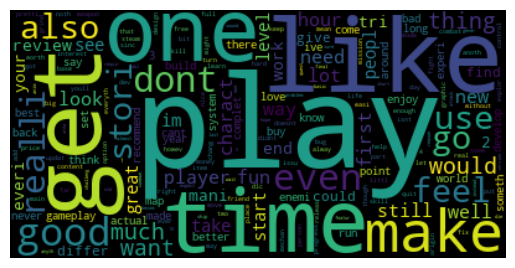

In [196]:
# wordclouds
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from string import punctuation

# english
wcdf = reviews_df[["game", "language", "review"]]
wcdf = wcdf.loc[wcdf["language"] == "english"]
wcdf.head()

# stopwords
sw = set(stopwords.words("english"))
sw.update(["game", "games", "game,"])
# stemming
stemmer = PorterStemmer()

wordcounter = Counter()
for reviewtext in wcdf["review"]:
    txt = reviewtext.strip().lower()
    # txt = 
    txt = ''.join(filter(lambda x: x.isalpha() or x.isdigit() or x.isspace(), txt))
    words = txt.split()
    words = [w for w in words if w not in sw]
    words = [stemmer.stem(w) for w in words]
    wordcounter.update(words)

# print([k for k,v in wordcounter.most_common(100)])

wordcloud = WordCloud().generate_from_frequencies(frequencies=dict(wordcounter))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()